### Problem Statement

words go here

In [1]:
#imports 
import pandas as pd
import re
import emoji
from datetime import datetime

from matplotlib import pyplot as plt
import seaborn as sns


In [3]:
# run if you need to install emoji
# pip install emoji

In [4]:
# load data
reddits = pd.read_csv('../data/reddit_time.csv')

In [5]:
# boxplot function
def box_plot(df, column_name):
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 10))

    sns.boxplot(data=df[column_name], 
                ax=ax1,
                showmeans=True, 
                width=0.5,
                palette=('pink', 8))
    
    ax2.hist(df[column_name], color='pink', orientation='horizontal')
    ax1.set_title(column_name, fontsize=16)
    ax2.set_title(column_name, fontsize=16)
    ax1.set_facecolor('whitesmoke')
    ax2.set_facecolor('whitesmoke');

In [43]:
# joint plot function 
def joint_plot(df, independent):
    sns.set_theme(style="darkgrid")
    g = sns.jointplot(x=independent, y="num_comments", data=df,
                  kind='reg', joint_kws = {'scatter_kws':dict(alpha=0.50)},
                  color="m", height=8)    

### Data formatting

In [7]:
# string replaces

reddits.title = [t.replace ('¯\_(ツ)_/¯', ' ') for t in reddits.title]
reddits.title = [t.replace('\(^u^)/', ' ') for t in reddits.title]
reddits.title = [t.replace('●', ' ') for t in reddits.title]
reddits.title = reddits.title.apply(lambda x: emoji.\
                                       replace_emoji(x, replace=''))
reddits.title = reddits.title.replace('[^a-zA-Z0-9 ]', '', regex=True)
reddits.title = reddits.title.str.normalize('NFKD').str.encode('ascii', 
                                               errors='ignore').str.decode('utf-8')




In [8]:
# find and replace now empty titles with NaNs
reddits.title.replace('', float("NaN"), inplace=True)
reddits.dropna(subset = ['title'], inplace=True)

In [9]:
# number of words in a title
reddits['num_words'] = reddits.title.apply(lambda x: len(x.split(' ')))

In [10]:
# length of title string
reddits['num_chars'] = reddits.title.apply(lambda x: len(x))

In [11]:
# convert datetime to seconds
reddits.length_time = reddits.length_time.apply(lambda x: pd.Timedelta(x).total_seconds())

In [30]:
# check datatypes
reddits.dtypes

author           object
title            object
created         float64
num_comments      int64
subreddit        object
score             int64
upvote_ratio    float64
length_time     float64
num_words         int64
num_chars         int64
dtype: object

### Data clean up
(after reviewing summary statistics)

In [18]:
# take a look at the data... 144 rows can be dropped
reddits[reddits.num_comments > 1000].shape
# drop rows with values greater than 1000
reddits.drop(reddits[reddits.num_comments > 1000].index, inplace=True)


In [19]:
# take a look at the data... 1066 rows can be dropped
reddits[reddits.score > 5000].shape
# drop rows with values greater than 5000 score
reddits.drop(reddits[reddits.score > 5000].index, inplace=True)


In [20]:
# reset index after dropping rows
reddits.reset_index(inplace=True, drop=True)

### Summary statistics

#### Number of comments

In [21]:
# summary stats for num_comments
reddits.num_comments.describe()

count    12277.000000
mean        60.606907
std         92.821035
min          1.000000
25%         12.000000
50%         28.000000
75%         68.000000
max        997.000000
Name: num_comments, dtype: float64

In [22]:
reddits.num_comments.skew()

3.857328490457204

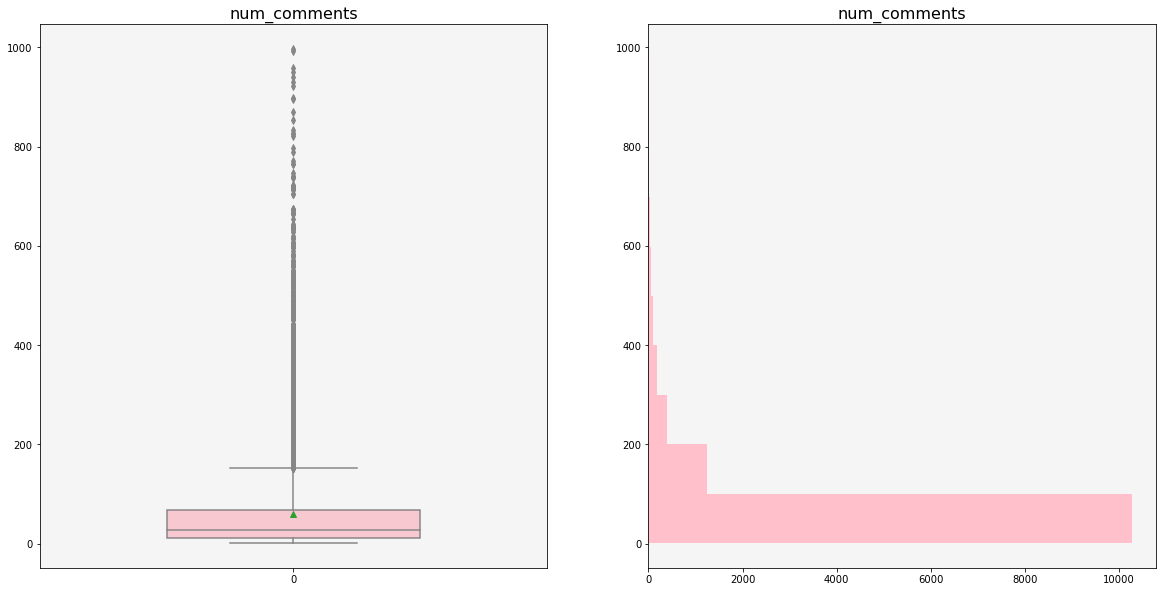

In [23]:
box_plot(reddits, 'num_comments')

The mean and median for 'num_comments' is significantly diverged, with the mean being almost double the median.  The data is very positively skewed, and while there's little spread through the IQR, the outliers extend the spread extensively.  

#### Score

In [24]:
# stats summary for score
reddits.score.describe()

count    12277.000000
mean       990.593223
std        991.490215
min         75.000000
25%        305.000000
50%        616.000000
75%       1299.000000
max       4999.000000
Name: score, dtype: float64

In [25]:
reddits.score.skew()

1.7838245819218457

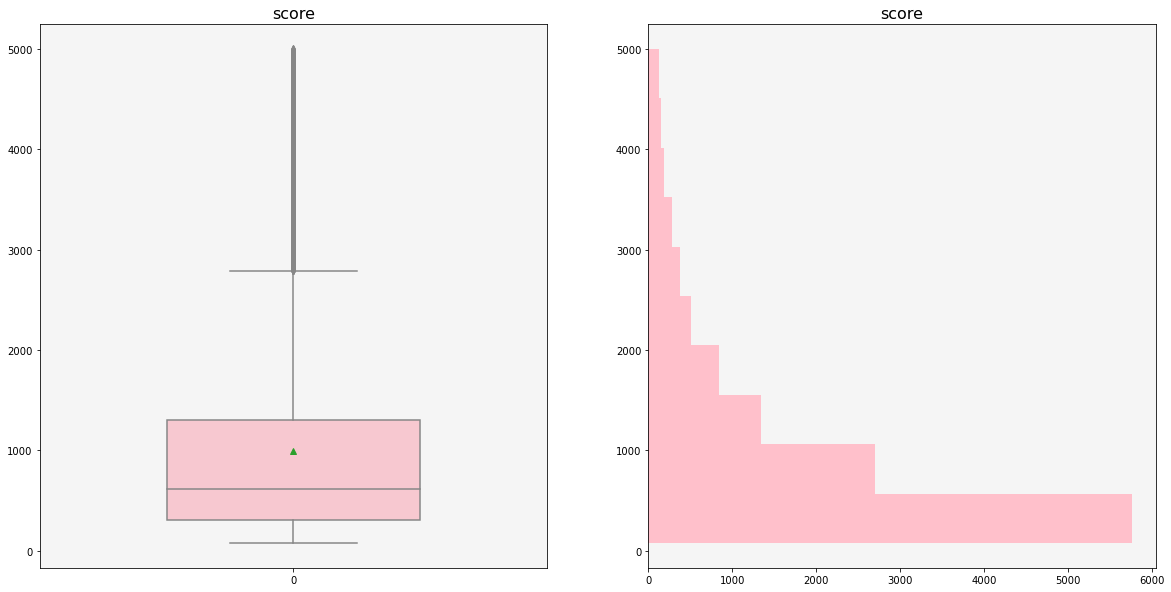

In [26]:
box_plot(reddits, 'score')

The mean and median for 'score' are significantly diverged, with the mean being approximately a 50% increase over the median. The data is very positively skewed.  The spread through the IQR is moderate, but there are a lot of outliers that contribute to the spread. 

#### Length of time

In [27]:
# summary stats for length of time
reddits.length_time.describe()

count     12277.000000
mean      80523.230572
std       50053.045468
min        2629.883409
25%       31943.884851
50%       73722.883815
75%      127527.875751
max      179606.872275
Name: length_time, dtype: float64

In [28]:
reddits.length_time.skew()

0.003593082972080204

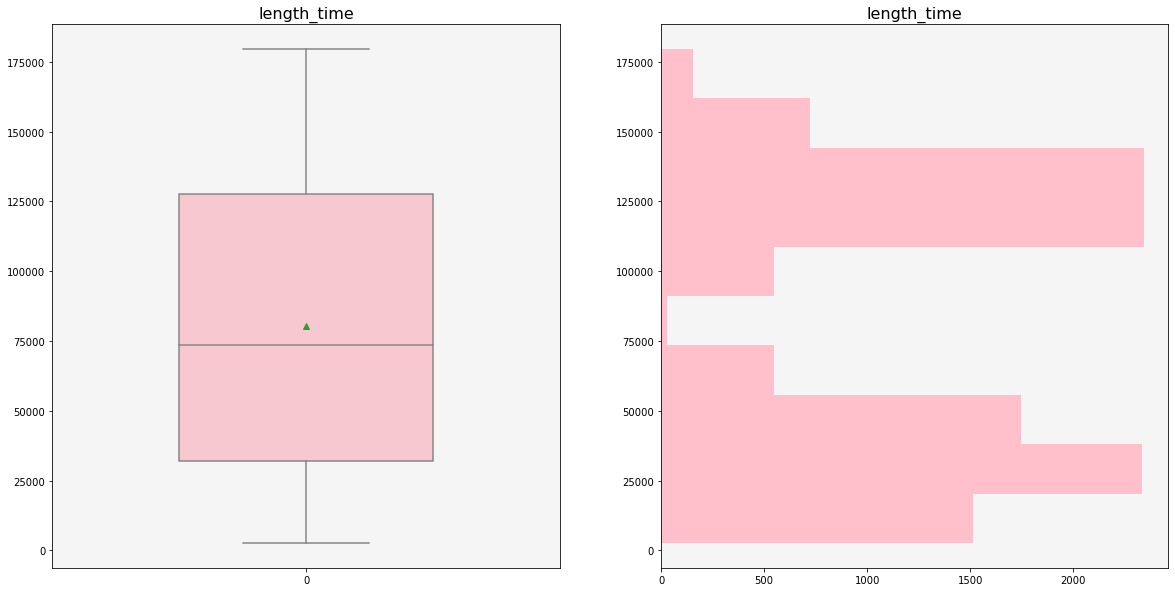

In [29]:
box_plot(reddits, 'length_time')

While the mean and median are fairly offset from each other, when compared to the IQR spread, they're comparatively close together.  The data is very slightly positively skewed, and the distribution is bimodal.  The IQR is very spread, with no outliers. 

#### Number of words

In [31]:
# summary statis for number of words
reddits.num_words.describe()

count    12277.000000
mean         9.521789
std          8.576812
min          1.000000
25%          4.000000
50%          7.000000
75%         12.000000
max         63.000000
Name: num_words, dtype: float64

In [32]:
reddits.num_words.skew()

2.292119221685082

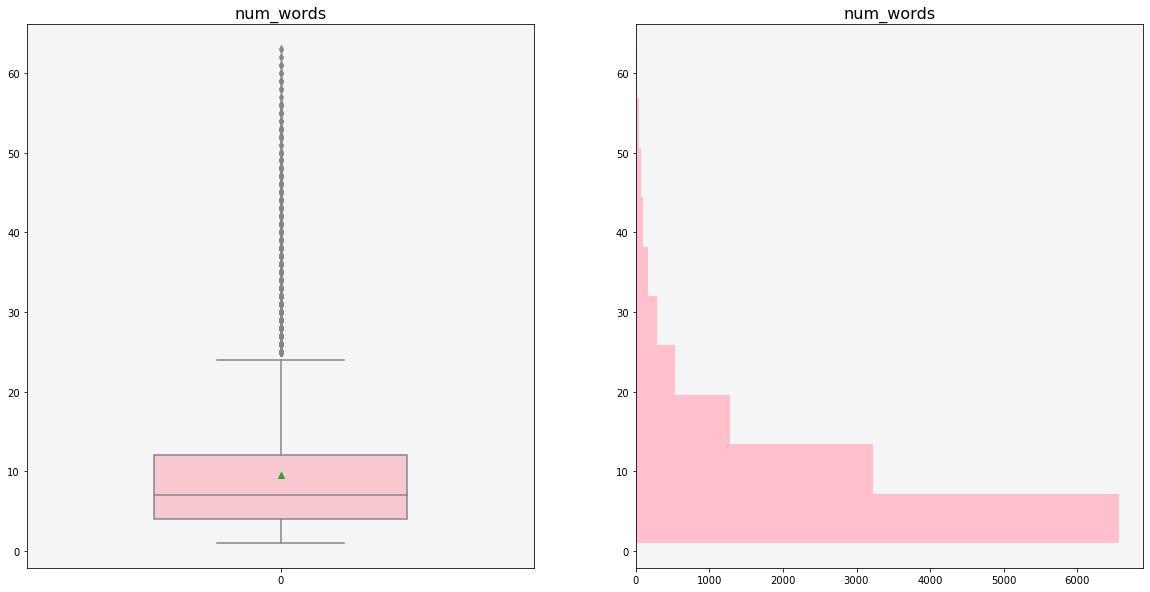

In [33]:
box_plot(reddits, 'num_words')

The mean is offset from the median, and the data is very positively skewed.  The IQR shows very little spread, though there are outliers that contribute to the spread. 

#### Number of characters

In [34]:
# summary stats for title length
reddits.num_chars.describe()

count    12277.000000
mean        51.125112
std         46.742872
min          1.000000
25%         21.000000
50%         37.000000
75%         65.000000
max        300.000000
Name: num_chars, dtype: float64

In [35]:
reddits.num_chars.skew()

2.3186482281095397

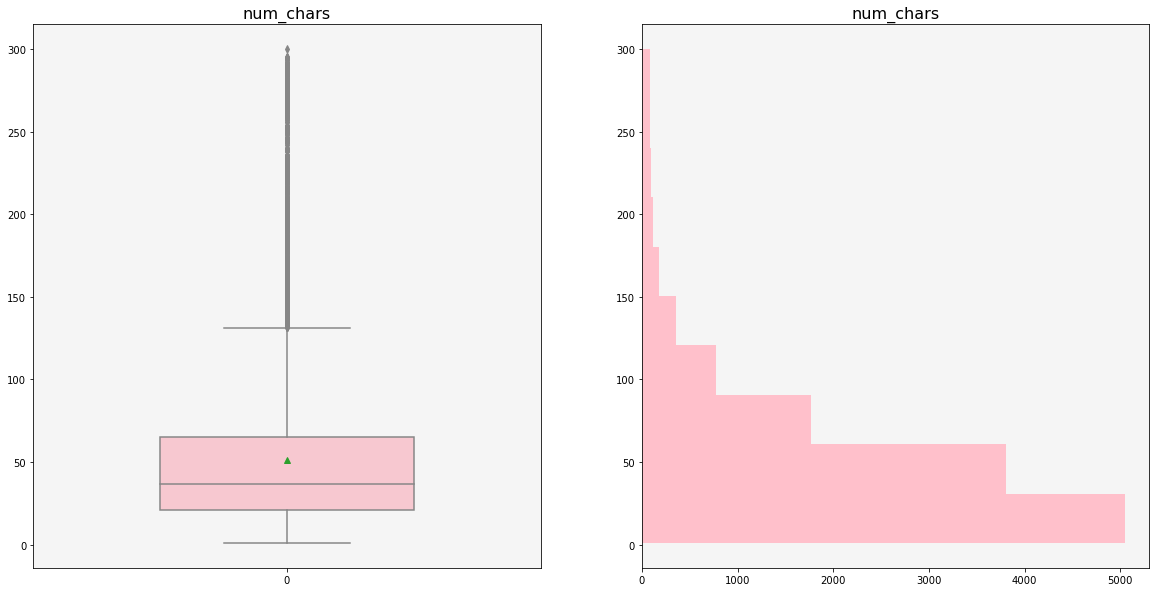

In [36]:
box_plot(reddits, 'num_chars')

For number of characters, then mean is offset from the median.  The data is very positively skewed, and the spread though the IQR is small, though outliers contribute to considerable spread. 

In [37]:
# write out to new csv
reddits.to_csv('../data/reddit_clean.csv', index=False, chunksize=1000)

### Visualizations

#### Number of words

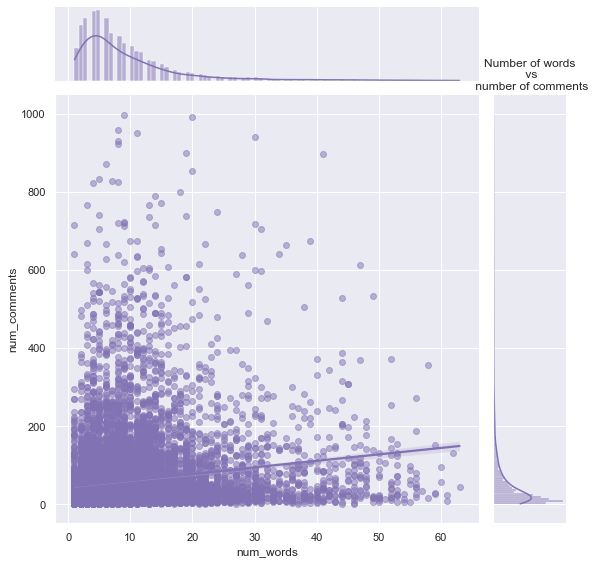

In [45]:
joint_plot(reddits, 'num_words')
plt.title('Number of words\n vs\n number of comments');

Plotting number of words to number of comments, there doesn't seem to be any direct linear relationship between the two.  The data is highly clustered.

#### Score

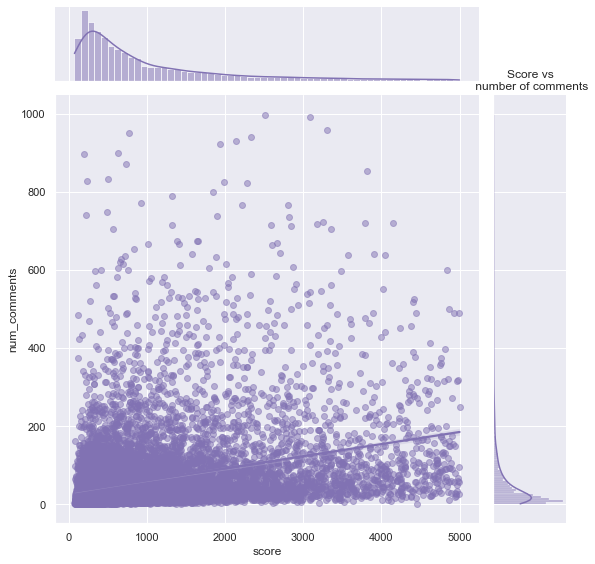

In [46]:
joint_plot(reddits, 'score')
plt.title('Score vs\n number of comments');

Plotting score vs number of comments, there doesn't seem to be any direct linear relationship.  Data is highly clustered.

#### Length of time

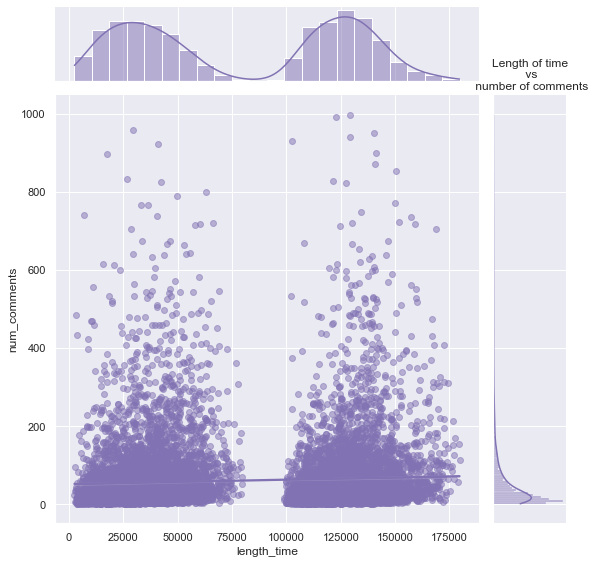

In [47]:
joint_plot(reddits, 'length_time')
plt.title('Length of time\n vs\n number of comments');

There are two distinct clusters which align with the webscraping data pulls.  The data shows no direct linear relationship.  

#### Top 20 most popular subreddits

In [48]:
subs = pd.DataFrame(reddits.groupby('subreddit').sum()['num_comments'].sort_values(ascending=False))

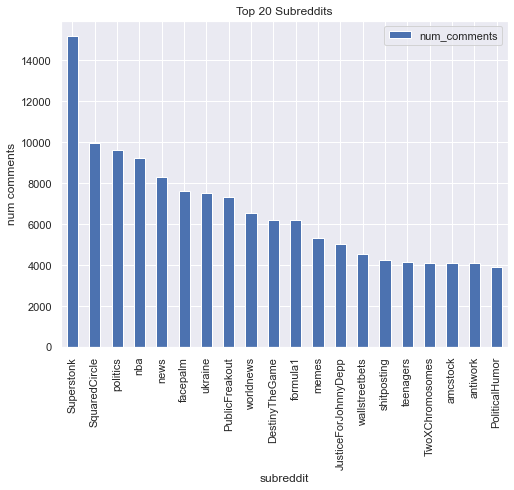

In [49]:
bar = subs[subs.num_comments > 1000].head(20).\
    plot(figsize = (8,6), 
         title = 'Top 20 Subreddits',
         ylabel='num comments',
         kind = 'bar')
fig = bar.get_figure()
fig.savefig('../assets/top20.png')

The subreddit 'Superstonk' leads by quite a significant margin (15,196).  There is a broad theme of subreddits relating to the news cycle, such as politics (9,601), news (8,281), ukraine (7,526), and world news (6,520).

### Data dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|author|object|Reddit|User name of the author of the reddit post| 
|title|object|Reddit|Title of the reddit post|
|created|float64|Reddit|Date reddit was created|
|num_comments|int64|Reddit|Number of comments on the reddit post|
|subreddit|object|Reddit|The subreddit that the reddit post belongs to|
|score|int64|Reddit|The number of upvotes the reddit has|
|upvote_ratio|float64|Reddit|The percentage of upvotes from all votes on the reddit|
|length_time|float64|Calculated|The length of time a reddit post has been up|
|num_words|int64|Calculated|The number of words in the reddit title|
|num_chars|in64|Calculated|The number of characters in the reddit title|

